# 1. Vectors & Vector Spaces

In [ ]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt


(1038, 692)
(100, 100)


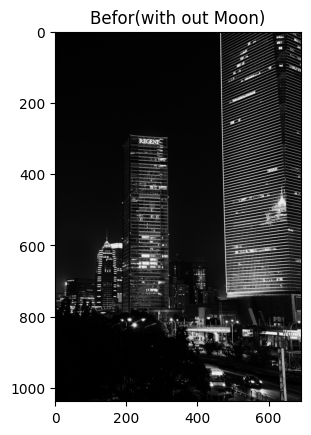

In [49]:
# open grayscale image 
image1 = Image.open("Images/city.jpg").convert("L").resize((692 , 1038))
image2 = Image.open("Images/moon.jpg").convert("L") . resize((100,100))

# Convert Images to matrix(array)
array1 = np.asarray(image1)
array2 = np.asarray(image2)
# for example to see the image is realy is matrix we can see the shape of matrix and ...
print(array1.shape)
print(array2.shape)
plt.title("Befor(with out Moon)")
plt.imshow(array1 , cmap="gray" )


# Image padding
<div dir="rtl">

ما تکنیک های زیادی در Image padding داریم بسته به کاری که میخواهیم انجام دهیم اما تکنیکی که در اینجا استفاده میخواهیم بکنیم برای Image blending (‌اضافه کردن ۲ تصویر به هم )‌ و برای عملیاتی کردن این هدف تصویری که میخواهیم اضافه کنیم ( در این مثال ماه )‌را باید با توجه به لوکیشنی که در تصویر میخواهیم بگذاریم را Pad بکنیم در واقعیت پد کردن در اینجا به معنای اضافه کردن ۰ به سطر و سطون های ماتریس (پیکسل)تصویر ماه است **( به این دلیل  که ۰ در جمع کردن بی اثر هست که از خواص فضای برداری )** تا انجایی که تصویر ماه اندازه تصویری شود که میخواهیم ماه را به آن اضافه کنیم (بسته به جایی که میخواهیم ماه را در تصویر نشان بدهیم اضافه کردن ۰ ها به سطر و سطون ها میتواند متفاوت باشد )‌ در تصویر زیر مثالی از    Image Padding مشاهده میکنیم  
</div>  

![padding example.png](https://raw.githubusercontent.com/parhambt/Using-Linear-Algebra-in-simple-Image-Processing-for-Calc2/refs/heads/master/Images/padding%20example.png)

### what is Image blending
### به معنای اضافه کردن ۲ تصویر به هم دیگه (‌ میتواند وزن داد برای اضافه کردن ۲ تصویر به هم اما ما اینجا حالت بدون وزن را برای راحتی بررسی میکنیم )


![image.png](https://raw.githubusercontent.com/parhambt/Using-Linear-Algebra-in-simple-Image-Processing-for-Calc2/refs/heads/master/Images/Image_blendin_%20Example.jpg)

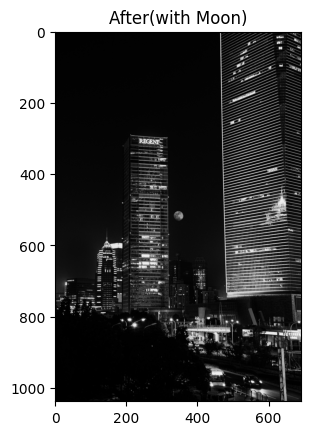

In [50]:
height = max(array1.shape[0], array2.shape[0]) # انتخاب بزرگترین عرض تصویر بین ۲ تصویر ماه و عکس ساختمان در شهر
width = max(array1.shape[1], array2.shape[1]) # انتخاب بزرگترین طول تصویر بین ۲ تصویر ماه و عکس ساختمان در شهر
def pad_to_size(img, target_height, target_width):
    """
    pad moon image to middle of Image with bulidings in city cords
    """
    h, w = img.shape[:2] # طول و عرض تصویر ماه= اون عکس کوچک تری که میخواهیم در تصویر بزرگتر اضافه کنیم
    top = (target_height - h) // 2 # اینجا ما میخواهیم ماه را در وسط تصویر ساختمان ها بگذاریم یعنی باید ماه در عرضی  به اندازه عرض کله تصویر ساختمان ها منهای عرض خود ماه تقسیم بر ۲ باشد
    bottom = target_height - h - top # عرض پایین ترین نقطه ماه هم طبق توضیحات بالا از همچین فرمولی بدست می اید 
    left = (target_width - w) // 2 #  بدست اوردن طول چپ و راست تصویر هم مث بدست اوردن اندازه عرض بالا و پایین است
    right = target_width - w - left
    return np.pad(img, ((top, bottom), (left, right)), mode='constant', constant_values=(0)) # تصویر ماه را پد میکنیم وسط تصویره ساختمان ها و مقادیری که به جای خونه های ماتریسی که به تصویر ماه داریم اضافه میکنیم مانند تصویر بالا با عدد ۰ هست
def safe_add_images(img1, img2):
    """
    Adds two images manually with per-pixel capping at 255 .
    """
    h, w = img1.shape
    result = np.zeros((h, w), dtype=np.uint8) # ساخت ماتریسی از ۰ به اندازه ماتریس شکل ساخته شده 
    for i in range(h):
        for j in range(w):
            pixel_sum = int(img1[i, j]) + int(img2[i, j]) # جمع زدن متناظر اعداد نشاندهنده شدت رنگ در ماتریس 
            result[i, j] = 255 if pixel_sum > 255 else pixel_sum # اگر در جمع زدن اعداد بیشتر از ۲۵۵ شدن آن ها رو ۲۵۵ میگذاریم که 

    return result
array2_padded = pad_to_size(array2, height, width)

added_array = safe_add_images(array1, array2_padded)# حال میتوانیم ۲ تا ماتریس هم سایز را با هم جمع کرد 
added_image = Image.fromarray(added_array)

plt.title("After(with Moon)") # اگر به وسط تصویر دقت کنید میتوانید ماه را به خوبی مشاهده کنید
plt.imshow(added_image , cmap="gray" )

### در کد های بالا ما به عینه استفاده از ۲ تا از خواص فضای برداری استفاده کردیم 
### ۱.بی اثر بودن عنصر ۰ فضای خطی در جمع کردن
### ۲.بسته بودن فضای خطی نسبت به عمل جمع